In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# Se cargan los datos automaticamente 

ruta_completa = os.getcwd()
ruta_completa = ruta_completa + '\data_to_transform\df.csv'

df = pd.read_csv(ruta_completa)
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:37:36.4490-0500,Murillo
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:39:34.0869-0500,Murillo
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:41:38.1739-0500,Murillo
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:53:33.8200-0500,Murillo
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:55:20.5970-0500,Murillo
...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T18:53:10.4680-0400,Rio de Janeiro
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T19:26:46.7760-0400,Rio de Janeiro
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T20:13:59.2720-0400,Rio de Janeiro
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T20:14:36.1140-0400,Rio de Janeiro


**Diccionario de variables:**

- Duration: Describe la duración en segundos de la interacción que tuvo el usuario con la olla. Pudo ser debido a un movimiento o a la interacción con el panel de un solo botón.
- MovementDuration: Indica la duración en segundos del movimiento que registró la olla
- MovementInteractions: Indica la cantidad de veces que movieron la olla
- HardwareInteractions: Indica la cantidad de veces que el usuario interactuó con el extraordinario panel de un solo botón
- Key: Es un código interno que permite identificar la olla. Corresponde al campo IDENTIFICADOR_OLLA
- Date: Fecha en formato ISO8601
- Name: Nombre de la ciudad donde se produjo la interacción


In [11]:
# Se identifica el formato para cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96032 entries, 0 to 96031
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Duration              96032 non-null  int64 
 1   MovementDuration      96032 non-null  int64 
 2   MovementInteractions  96032 non-null  int64 
 3   HardwareInteractions  96032 non-null  int64 
 4   Key                   96032 non-null  object
 5   Date                  96032 non-null  object
 6   Name                  96032 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.1+ MB


**Es necesario convertir la variable Date a DateTime para realizar la generación de variables de tiempo**

----------------------------------------

In [13]:
#Conversión del tipo de dato 
df['Date'] = pd.to_datetime(df['Date'], utc= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96032 entries, 0 to 96031
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Duration              96032 non-null  int64              
 1   MovementDuration      96032 non-null  int64              
 2   MovementInteractions  96032 non-null  int64              
 3   HardwareInteractions  96032 non-null  int64              
 4   Key                   96032 non-null  object             
 5   Date                  96032 non-null  datetime64[ns, UTC]
 6   Name                  96032 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 5.1+ MB


**Variables con el formato a trabajar**

--------------------------------------

In [14]:
# Se comprueba si existe varlores faltantes
df.isna().sum().sort_values()

Duration                0
MovementDuration        0
MovementInteractions    0
HardwareInteractions    0
Key                     0
Date                    0
Name                    0
dtype: int64

**No existen valores faltantes**


--------------------------

In [10]:
# Se describen las variables cuantitativas
df.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions
count,96032.000000,96032.000000,96032.000000,96032.0
mean,198.850362,142.098353,1.342990,0.0
std,3982.561445,3654.373332,12.820468,0.0
min,0.000000,0.000000,0.000000,0.0
25%,9.000000,0.000000,0.000000,0.0
50%,15.000000,0.000000,0.000000,0.0
75%,21.000000,5.000000,1.000000,0.0
max,446732.000000,446716.000000,1620.000000,0.0


**Existe un error en la toma de datos para la variable de HardwareInteractions, debido a que presenta todos sus datos en 0.**

**Existen valores atipicos en Duration, MovementDuration y MovementInteractions, es decir, estas ollas pueden estar presentando error en la lectura de datos.**

# Nuevas variables

In [64]:
# Se crean neuvas variables a partir de la variable Date
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['time'] = df['Date'].dt.time
df['hour'] = df['Date'].dt.hour
df['date'] = df['Date'].dt.date
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,HardwareMovement,date
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36.449000,13,2,2020-07-31
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34.086900,13,15,2020-07-31
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38.173900,13,13,2020-07-31
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33.820000,13,15,2020-07-31
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20.597000,13,15,2020-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10.468000,22,9,2020-09-28
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46.776000,23,13,2020-09-28
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59.272000,0,12,2020-09-29
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36.114000,0,12,2020-09-29


La variable de duración es la sumatoria de la duración de los movimientos de la olla más la duración de los movimientos de la interacción con el tablero, por ende la duración del movimiento de los tableros es la duración total menos la duración de los movimientos de la olla.

Se calcula **HardwareMovement = Duration - MovementDuration**

In [16]:
df['HardwareMovement'] = df['Duration'] - df['MovementDuration']
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,HardwareMovement
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36.449000,13,2
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34.086900,13,15
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38.173900,13,13
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33.820000,13,15
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20.597000,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10.468000,22,9
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46.776000,23,13
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59.272000,0,12
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36.114000,0,12


**Se debe comprobar que la nueva variable no tenga valores negativos, ya que es de tiempo.**

In [19]:
df['HardwareMovement'].min().coun

0

**No existen valores negativos en la nueva variable**

<AxesSubplot:>

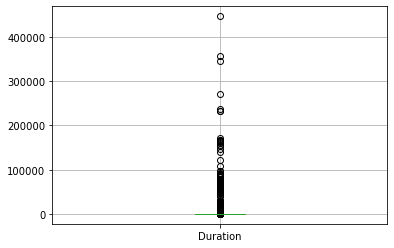

In [21]:
df.boxplot(column=['Duration'])

In [46]:
print(np.percentile(df['Duration'],90))
print(np.percentile(df['Duration'],91))
print(np.percentile(df['Duration'],92))
print(np.percentile(df['Duration'],93))
print(np.percentile(df['Duration'],94))
print(np.percentile(df['Duration'],95))
print(np.percentile(df['Duration'],96))
print(np.percentile(df['Duration'],97))
print(np.percentile(df['Duration'],98))
print(np.percentile(df['Duration'],99))
print(np.percentile(df['Duration'],100))

49.0
54.0
61.0
67.0
77.0
91.0
116.0
164.0
399.0
1752.070000000007
446732.0


In [47]:
print(np.percentile(df['MovementDuration'],90))
print(np.percentile(df['MovementDuration'],91))
print(np.percentile(df['MovementDuration'],92))
print(np.percentile(df['MovementDuration'],93))
print(np.percentile(df['MovementDuration'],94))
print(np.percentile(df['MovementDuration'],95))
print(np.percentile(df['MovementDuration'],96))
print(np.percentile(df['MovementDuration'],97))
print(np.percentile(df['MovementDuration'],98))
print(np.percentile(df['MovementDuration'],99))
print(np.percentile(df['MovementDuration'],100))

21.0
24.0
28.0
33.0
39.0
49.0
65.0
95.0
208.0
1180.0
446716.0


In [48]:
print(np.percentile(df['MovementInteractions'],90))
print(np.percentile(df['MovementInteractions'],91))
print(np.percentile(df['MovementInteractions'],92))
print(np.percentile(df['MovementInteractions'],93))
print(np.percentile(df['MovementInteractions'],94))
print(np.percentile(df['MovementInteractions'],95))
print(np.percentile(df['MovementInteractions'],96))
print(np.percentile(df['MovementInteractions'],97))
print(np.percentile(df['MovementInteractions'],98))
print(np.percentile(df['MovementInteractions'],99))
print(np.percentile(df['MovementInteractions'],100))

2.0
2.0
2.0
2.0
3.0
3.0
3.0
4.0
6.0
11.0
1620.0


In [58]:
filtro = df[(df['Duration'] <= 399) & (df['MovementDuration'] <= 399) ]
filtro

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,HardwareMovement
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36.449000,13,2
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34.086900,13,15
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38.173900,13,13
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33.820000,13,15
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20.597000,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10.468000,22,9
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46.776000,23,13
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59.272000,0,12
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36.114000,0,12


In [59]:
filtro.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,HardwareMovement
count,94112.000000,94112.000000,94112.000000,94112.0,94112.000000,94112.000000
mean,21.734168,7.151405,0.635679,0.0,17.838926,14.582763
std,31.454226,24.004021,1.700558,0.0,4.657943,19.205732
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.0,16.000000,5.000000
50%,15.000000,0.000000,0.000000,0.0,19.000000,14.000000
75%,20.000000,5.000000,1.000000,0.0,21.000000,15.000000
max,399.000000,389.000000,135.000000,0.0,23.000000,392.000000


<AxesSubplot:xlabel='Duration'>

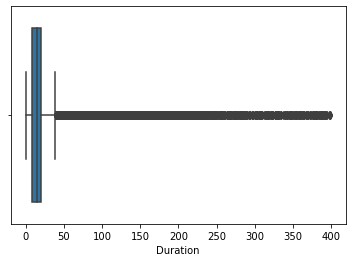

In [60]:
sns.boxplot(x=filtro['Duration'])

In [61]:
ollas_defectuosas = df[(df['Duration'] > 399) & (df['MovementDuration'] > 399) ]
ollas_defectuosas

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,HardwareMovement
5,556,543,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:56:04.579000+00:00,Murillo,Friday,July,13:56:04.579000,13,13
400,5496,5489,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-20 17:01:38.668000+00:00,Murillo,Thursday,August,17:01:38.668000,17,7
752,2091,2079,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-09 21:25:25.035000+00:00,Murillo,Wednesday,September,21:25:25.035000,21,12
863,4472,4458,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-15 18:52:16.690900+00:00,Murillo,Tuesday,September,18:52:16.690900,18,14
1051,3350,3335,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-23 17:30:02.220000+00:00,Murillo,Wednesday,September,17:30:02.220000,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...
93316,703,694,3,0,628ded2887a64a9b8f0d53865c70e090,2021-01-08 00:26:32.863000+00:00,Armenia,Friday,January,00:26:32.863000,0,9
93436,1190,1178,1,0,628ded2887a64a9b8f0d53865c70e090,2021-01-22 21:48:20.042000+00:00,Armenia,Friday,January,21:48:20.042000,21,12
93791,583,571,1,0,632405e8e31846ec8169fb227f37118b,2020-11-13 22:00:49.767000+00:00,Pasto,Friday,November,22:00:49.767000,22,12
95103,443,431,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-08-06 14:51:57.852000+00:00,Rio de Janeiro,Thursday,August,14:51:57.852000,14,12


In [62]:
ollas_defectuosas.groupby('Key')['Duration'].count()

Key
02a5d1c69f5d44cfa9d2a256e62725a7     35
053b8b9d38d14f0097a16ff3f2df98fa     20
070fce8dd1b0443cafbbad0eccba462e     24
089e9a21a113498dbcd1274ca31d9314     27
096c10aac4214c11a67e10473671a3ca     11
09c4d9955cd24c0e97c19a765af8b014     32
115c61b3012b41e78814f61ad72bbb15     40
11ccd89d25d14680b4d74cadf92c1c00     33
139b85b77ec94577864eb7a6ccb61cdf      8
13ebee2247fd427b809676163e4c6590     15
18aa24fd3e3b4006aa5ebdd0a7400704      3
1a4564e4e05d452996962259bb7cbf90     11
1da79dc062a1498786b5ed172362a7fc     30
1e8656f6b89c4f19bd47cb8bef23b4fa      5
1e9bf02e0c0c48438f1019717734232f    780
246983454b2d4f3081e713e524b272db     29
2771d4adc72b40348aa70131a605dd15      3
29b6ee7caa4e409eb35ab50cf763028e     48
2a8871b1fc3b4bb0a350263e6828086d      1
2c241909eb624792ad0226844a899c12     27
2d8591c8a73840d692d1aaceb8f7e016     17
2f8ec18d8a764803b73ec9cf13d661a9     56
2fcb06120c8a47c49a45d7295aab342d     24
318c42f457ab4fd291123fd53c06f8fc     83
3196ec1df9384ad08a00abcd1bc01a97    

In [63]:
df[df['Key'] == '1e9bf02e0c0c48438f1019717734232f']

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,HardwareMovement
41602,15,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 17:04:47.554000+00:00,Cartagena,Thursday,January,17:04:47.554000,17,15
41603,6,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 17:17:59.785000+00:00,Cartagena,Thursday,January,17:17:59.785000,17,6
41604,8,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:07:33.429000+00:00,Cartagena,Thursday,January,18:07:33.429000,18,8
41605,21,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:08:39.987000+00:00,Cartagena,Thursday,January,18:08:39.987000,18,21
41606,15,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:33:54.151000+00:00,Cartagena,Thursday,January,18:33:54.151000,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...
44692,2036,1558,43,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:01:42.496000+00:00,Cartagena,Friday,December,14:01:42.496000,14,478
44693,5,4,2,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:36:09.448000+00:00,Cartagena,Friday,December,14:36:09.448000,14,1
44694,176,120,6,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:36:45.281900+00:00,Cartagena,Friday,December,14:36:45.281900,14,56
44695,225,113,7,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:40:05.233000+00:00,Cartagena,Friday,December,14:40:05.233000,14,112


In [69]:
use_olla = (df.groupby(['Key', 'date'])['Duration'].sum()).reset_index()
use_olla

,Key,date,Duration
0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31,1089
1,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-01,23
2,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-03,1184
3,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-04,160
4,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-05,755
...,...,...,...
3952,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-25,524
3953,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-26,231
3954,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-27,696
3955,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28,315


<AxesSubplot:xlabel='date', ylabel='Duration'>

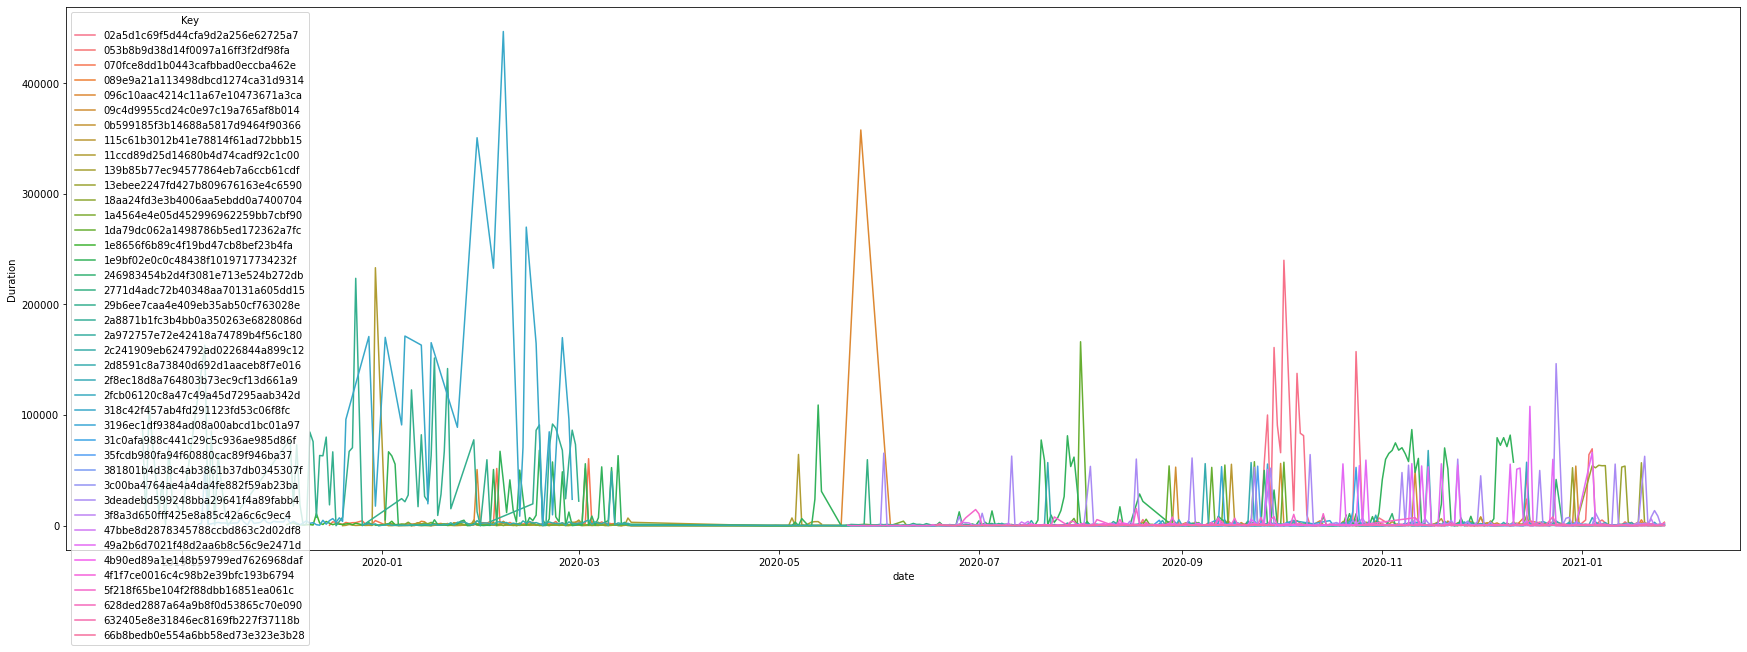

In [73]:
plt.figure(figsize=(30,10))
sns.lineplot(x="date", y="Duration", hue="Key", data=use_olla)